## Webscraping

In [67]:
%pip install beautifulsoup4 requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
from warnings import filterwarnings
filterwarnings("ignore")

#### Get the html content from webpage

In [69]:
url1 = "https://en.wikipedia.org/wiki/World_population"
print(url1)

https://en.wikipedia.org/wiki/World_population


In [70]:
import requests

In [71]:
response = requests.get(url = url1)
response

<Response [200]>

#### Response 200 means Okay Data is fetched
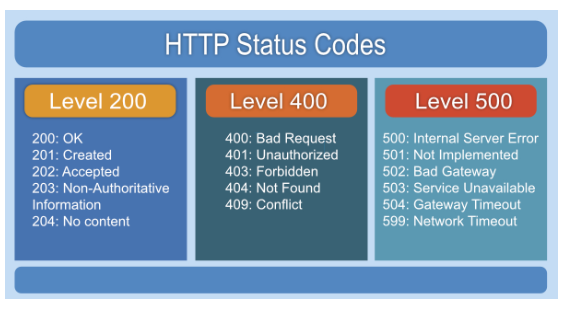

In [72]:
content = response.content

In [73]:
print(content)

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>World population - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled ve

In [74]:
print(content[0:1000]) #printing content from 0 to 1000

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>World population - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled ve

#### 1. Get the title of webpage

In [75]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(content)

In [76]:
# title of webpage
title_tag = soup.find("title")
title_tag

<title>World population - Wikipedia</title>

In [77]:
# getting only text from title
t = title_tag.text
print(t)

World population - Wikipedia


#### Get Main heading from body

####  in html h1 is main tag for headlines

In [78]:
h1_tag = soup.find("h1",class_ = "firstHeading")
h1_tag

<h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-main">World population</span></h1>

In [79]:
type(h1_tag)

bs4.element.Tag

In [80]:
h1_text = h1_tag.text 

In [81]:
h1_text

'World population'

In [82]:
type(h1_text)

str

#### Geting all subheading from this website

In [83]:
s_tags = soup.find_all("div",class_ = "mw-heading")
s_tags

[<div class="mw-heading mw-heading2"><h2 id="History">History</h2></div>,
 <div class="mw-heading mw-heading3"><h3 id="Ancient_and_post-classical_history">Ancient and post-classical history</h3></div>,
 <div class="mw-heading mw-heading3"><h3 id="Modern_history">Modern history</h3></div>,
 <div class="mw-heading mw-heading3"><h3 id="Milestones_by_the_billions">Milestones by the billions</h3></div>,
 <div class="mw-heading mw-heading2"><h2 id="Global_demographics">Global demographics</h2></div>,
 <div class="mw-heading mw-heading2"><h2 id="Population_by_region">Population by region</h2></div>,
 <div class="mw-heading mw-heading2"><h2 id="Largest_populations_by_country">Largest populations by country</h2></div>,
 <div class="mw-heading mw-heading3"><h3 id="Ten_most_populous_countries">Ten most populous countries</h3></div>,
 <div class="mw-heading mw-heading3"><h3 id="Most_densely_populated_countries">Most densely populated countries</h3></div>,
 <div class="mw-heading mw-heading2"><h2 i

In [84]:
s_tags[0]

<div class="mw-heading mw-heading2"><h2 id="History">History</h2></div>

In [85]:
len(s_tags)

25

In [86]:
s_tags[0].text

'History'

In [87]:
subheading = [tag.text for tag in s_tags]
subheading

['History',
 'Ancient and post-classical history',
 'Modern history',
 'Milestones by the billions',
 'Global demographics',
 'Population by region',
 'Largest populations by country',
 'Ten most populous countries',
 'Most densely populated countries',
 'Fluctuation',
 'Annual population growth',
 'Population growth by region',
 'Past population',
 'Projections',
 'Mathematical approximations',
 'Years for world population to double',
 'Number of humans who have ever lived',
 'Human population as a function of food availability',
 'See also',
 'Explanatory notes',
 'References',
 'Citations',
 'General and cited sources',
 'Further reading',
 'External links']

#### Extract all the paragraphs and store the content in a text file

In [88]:
p_tags = soup.find_all("p")
p_tags[1]

<p>In <a href="/wiki/Demographics_of_the_world" title="Demographics of the world">world demographics</a>, the <b>world population</b> is the total number of <a href="/wiki/Human" title="Human">humans</a> currently alive. It was estimated by the United Nations to have exceeded eight billion in mid-November 2022. It took around 300,000 years of human <a href="/wiki/Prehistory" title="Prehistory">prehistory</a> and <a href="/wiki/Human_history" title="Human history">history</a> for the human population to reach a billion and only 218 more years to reach 8 billion.
</p>

In [89]:
p_text = [tag.text for tag in p_tags]
p_text[1]

'In world demographics, the world population is the total number of humans currently alive. It was estimated by the United Nations to have exceeded eight billion in mid-November 2022. It took around 300,000 years of human prehistory and history for the human population to reach a billion and only 218 more years to reach 8\xa0billion.\n'

In [90]:
p_str = "\n".join(p_text)
print(p_str[0:1000])



In world demographics, the world population is the total number of humans currently alive. It was estimated by the United Nations to have exceeded eight billion in mid-November 2022. It took around 300,000 years of human prehistory and history for the human population to reach a billion and only 218 more years to reach 8 billion.

The human population has experienced continuous growth following the Great Famine of 1315–1317 and the end of the Black Death in 1350, when it was nearly 370,000,000.[2] The highest global population growth rates, with increases of over 1.8% per year, occurred between 1955 and 1975, peaking at 2.1% between 1965 and 1970.[3] The growth rate declined to 1.1% between 2015 and 2020 and is projected to decline further in the 21st century.[4] The global population is still increasing, but there is significant uncertainty about its long-term trajectory due to changing fertility and mortality rates.[5] The UN Department of Economics and Social Affairs projects betw

In [91]:
with open("WorldPop.txt", "w",encoding="utf-8") as file1:
    file1.write(p_str)

### Extract the all image urls
### all image or urls are stored in tag(a)

In [92]:
a_tags = soup.find_all("a",class_ = "mw-file-description")

In [93]:
a_tags

[<a class="mw-file-description" href="/wiki/File:World_Population_Prospects.svg"><img class="mw-file-element" data-file-height="676" data-file-width="900" decoding="async" height="233" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/310px-World_Population_Prospects.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/465px-World_Population_Prospects.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/620px-World_Population_Prospects.svg.png 2x" width="310"/></a>,
 <a class="mw-file-description" href="/wiki/File:Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png"><img class="mw-file-element" data-file-height="7747" data-file-width="5201" decoding="async" height="387" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png/260px-Illustration_of_contempor

In [94]:
home_page = "https://en.wikipedia.org"
print(home_page)

https://en.wikipedia.org


In [95]:
a_tags[0].get("href")

'/wiki/File:World_Population_Prospects.svg'

In [96]:
home_page + a_tags[0].get("href")

'https://en.wikipedia.org/wiki/File:World_Population_Prospects.svg'

In [97]:
img_urls = [home_page + tag.get("href") for tag in a_tags]

In [98]:
img_urls

['https://en.wikipedia.org/wiki/File:World_Population_Prospects.svg',
 'https://en.wikipedia.org/wiki/File:Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png',
 'https://en.wikipedia.org/wiki/File:2020_1million_cities.jpg',
 'https://en.wikipedia.org/wiki/File:Expectancy_of_life.svg',
 'https://en.wikipedia.org/wiki/File:Population_pyramid_of_the_world_in_continental_groupings_2023.svg',
 'https://en.wikipedia.org/wiki/File:Global_population_cartogram.png',
 'https://en.wikipedia.org/wiki/File:People%27s_-Km%C2%B2_for_all_countries_(and_us_states,_uk_kingdoms).png',
 'https://en.wikipedia.org/wiki/File:Top_5_Country_Population_Graph_1901_to_2021.svg',
 'https://en.wikipedia.org/wiki/File:Population_Density,_v4.11,_2020_(48009093621).jpg',
 'https://en.wikipedia.org/wiki/File:World_population_(UN).svg',
 'https://en.wikipedia.org/wiki/File:Total_Fertility_Rate_Map_by_Country.svg',
 'https://en.wikipedia.org/wiki/File:World_population_counter,_Eureka,_Halifax,_

In [99]:
len(img_urls)

21

#### Extract the tables from websites

In [100]:
table_tags = soup.find_all("table",class_ = "wikitable")

In [101]:
table_tags

[<table class="wikitable" style="text-align:center; float:right; clear:right; margin-left:8px; margin-right:0;">
 <caption>World population milestones in billions<sup class="reference" id="cite_ref-:6_58-0"><a href="#cite_note-:6-58"><span class="cite-bracket">[</span>58<span class="cite-bracket">]</span></a></sup> (Worldometers estimates)
 </caption>
 <tbody><tr>
 <th scope="row">Population
 </th>
 <th scope="col">1
 </th>
 <th scope="col">2
 </th>
 <th scope="col">3
 </th>
 <th scope="col">4
 </th>
 <th scope="col">5
 </th>
 <th scope="col">6
 </th>
 <th scope="col">7
 </th>
 <th scope="col">8
 </th>
 <th scope="col">9
 </th>
 <th scope="col">10
 </th></tr>
 <tr>
 <th scope="row">Year
 </th>
 <td>1804</td>
 <td>1927</td>
 <td>1960</td>
 <td>1974</td>
 <td>1987</td>
 <td>1999</td>
 <td>2011</td>
 <td>2022</td>
 <td><i>2037</i></td>
 <td><i>2057</i>
 </td></tr>
 <tr>
 <th scope="row">Years elapsed
 </th>
 <td>200,000+</td>
 <td>123</td>
 <td>33</td>
 <td>14</td>
 <td>13</td>
 <td>12</t

In [102]:
table_tags[0]

<table class="wikitable" style="text-align:center; float:right; clear:right; margin-left:8px; margin-right:0;">
<caption>World population milestones in billions<sup class="reference" id="cite_ref-:6_58-0"><a href="#cite_note-:6-58"><span class="cite-bracket">[</span>58<span class="cite-bracket">]</span></a></sup> (Worldometers estimates)
</caption>
<tbody><tr>
<th scope="row">Population
</th>
<th scope="col">1
</th>
<th scope="col">2
</th>
<th scope="col">3
</th>
<th scope="col">4
</th>
<th scope="col">5
</th>
<th scope="col">6
</th>
<th scope="col">7
</th>
<th scope="col">8
</th>
<th scope="col">9
</th>
<th scope="col">10
</th></tr>
<tr>
<th scope="row">Year
</th>
<td>1804</td>
<td>1927</td>
<td>1960</td>
<td>1974</td>
<td>1987</td>
<td>1999</td>
<td>2011</td>
<td>2022</td>
<td><i>2037</i></td>
<td><i>2057</i>
</td></tr>
<tr>
<th scope="row">Years elapsed
</th>
<td>200,000+</td>
<td>123</td>
<td>33</td>
<td>14</td>
<td>13</td>
<td>12</td>
<td>12</td>
<td>11</td>
<td><i>15</i></td>
<td

In [103]:
%pip install lxml


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
import pandas as pd

In [105]:
df1 = pd.read_html(str(table_tags[0]))[0]

In [106]:
df1

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,"200,000+",123,33,14,13,12,12,11,15,20


In [107]:
dfs = []

for tag in table_tags:
    a = pd.read_html(str(tag))[0]
    dfs.append(a)

In [108]:
dfs

[      Population         1     2     3     4     5     6     7     8     9  \
 0           Year      1804  1927  1960  1974  1987  1999  2011  2022  2037   
 1  Years elapsed  200,000+   123    33    14    13    12    12    11    15   
 
      10  
 0  2057  
 1    20  ,
                                Region  2022 (percent)  2030 (percent)  \
 0                  Sub-Saharan Africa  1,152 (14.51%)  1,401 (16.46%)   
 1    Northern Africa and Western Asia     549 (6.91%)     617 (7.25%)   
 2      Central Asia and Southern Asia  2,075 (26.13%)  2,248 (26.41%)   
 3  Eastern Asia and Southeastern Asia  2,342 (29.49%)  2,372 (27.87%)   
 4         Europe and Northern America  1,120 (14.10%)  1,129 (13.26%)   
 5     Latin America and the Caribbean     658 (8.29%)     695 (8.17%)   
 6           Australia and New Zealand      31 (0.39%)      34 (0.40%)   
 7                             Oceania      14 (0.18%)      15 (0.18%)   
 8                               World            7942       

In [109]:
dfs[0]

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,"200,000+",123,33,14,13,12,12,11,15,20


In [110]:
dfs[1]

,Region,2022 (percent),2030 (percent),2050 (percent)
0,Sub-Saharan Africa,"1,152 (14.51%)","1,401 (16.46%)","2,094 (21.62%)"
1,Northern Africa and Western Asia,549 (6.91%),617 (7.25%),771 (7.96%)
2,Central Asia and Southern Asia,"2,075 (26.13%)","2,248 (26.41%)","2,575 (26.58%)"
3,Eastern Asia and Southeastern Asia,"2,342 (29.49%)","2,372 (27.87%)","2,317 (23.92%)"
4,Europe and Northern America,"1,120 (14.10%)","1,129 (13.26%)","1,125 (11.61%)"
5,Latin America and the Caribbean,658 (8.29%),695 (8.17%),749 (7.73%)
6,Australia and New Zealand,31 (0.39%),34 (0.40%),38 (0.39%)
7,Oceania,14 (0.18%),15 (0.18%),20 (0.21%)
8,World,7942,8512,9687


In [111]:
dfs[-1]

,Population (in billions),0.375,0.375.1,0.75,0.75.1,1.5,1.5.1,3,3.1,6,6.1,12,12.1
0,Year,1171,1171,1715,1715,1881,1881,1960,1960,1999,1999,c. 2100[140],c. 2100[140]
1,Years elapsed,—,544,544,166,166,79,79,39,39,39,c. 100+,c. 100+


In [112]:
len(dfs)

15

In [113]:
for i in dfs:
    display(i)

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,"200,000+",123,33,14,13,12,12,11,15,20


,Region,2022 (percent),2030 (percent),2050 (percent)
0,Sub-Saharan Africa,"1,152 (14.51%)","1,401 (16.46%)","2,094 (21.62%)"
1,Northern Africa and Western Asia,549 (6.91%),617 (7.25%),771 (7.96%)
2,Central Asia and Southern Asia,"2,075 (26.13%)","2,248 (26.41%)","2,575 (26.58%)"
3,Eastern Asia and Southeastern Asia,"2,342 (29.49%)","2,372 (27.87%)","2,317 (23.92%)"
4,Europe and Northern America,"1,120 (14.10%)","1,129 (13.26%)","1,125 (11.61%)"
5,Latin America and the Caribbean,658 (8.29%),695 (8.17%),749 (7.73%)
6,Australia and New Zealand,31 (0.39%),34 (0.40%),38 (0.39%)
7,Oceania,14 (0.18%),15 (0.18%),20 (0.21%)
8,World,7942,8512,9687


,Region,Density (inhabitants/km2),Population (millions),Most populous country,Most populous city (metropolitan area)
0,Asia,104.1,4641,"1,439,090,595 – India","13,515,000 – Tokyo Metropolis (37,400,000 – Gr..."
1,Africa,44.4,1340,"0,211,401,000 – Nigeria","09,500,000 – Cairo (20,076,000 – Greater Cairo)"
2,Europe,73.4,747,"0,146,171,000 – Russia, approx. 110 million in...","13,200,000 – Moscow (20,004,000 – Moscow metro..."
3,Latin America,24.1,653,"0,214,103,000 – Brazil","12,252,000 – São Paulo City (21,650,000 – São ..."
4,Northern America[note 1],14.9,368,"0,332,909,000 – United States","08,804,000 – New York City (23,582,649 – New Y..."
5,Oceania,5,42,"0,025,917,000 – Australia","05,367,000 – Sydney"
6,Antarctica,~0,0.004[86],N/A[note 2],"00,001,258 – McMurdo Station"


,Country / Dependency,Population,% of world,Date,Source (official or from the United Nations)
0,India,1425775850,17.5%,14 Apr 2023,UN projection[89]
1,China,1409670000,17.3%,17 Jan 2024,National annual estimate[90]
2,United States,337445089,4.14%,26 Jan 2025,National population clock[91]
3,Indonesia,278696200,3.42%,1 Jul 2023,National annual estimate[92]
4,Pakistan,229488994,2.81%,1 Jul 2022,UN projection[93]
5,Nigeria,216746934,2.66%,1 Jul 2022,UN projection[93]
6,Brazil,218719034,2.68%,26 Jan 2025,National population clock[94]
7,Bangladesh,168220000,2.06%,1 Jul 2020,Annual Population Estimate[95]
8,Russia,147190000,1.80%,1 Oct 2021,2021 preliminary census results[96]
9,Mexico,128271248,1.57%,31 Mar 2022,NaN


,#,Most populous countries,2000,2015,2030[A],"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org."
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_2,Unnamed: 2_level_2,Unnamed: 3_level_2,Unnamed: 4_level_2,Unnamed: 5_level_2
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_3,Unnamed: 2_level_3,Unnamed: 3_level_3,Unnamed: 4_level_3,Unnamed: 5_level_3
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_4,Unnamed: 2_level_4,Unnamed: 3_level_4,Unnamed: 4_level_4,Unnamed: 5_level_4
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_5,Unnamed: 2_level_5,Unnamed: 3_level_5,Unnamed: 4_level_5,Unnamed: 5_level_5
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_6,Unnamed: 2_level_6,Unnamed: 3_level_6,Unnamed: 4_level_6,Unnamed: 5_level_6
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_7,Unnamed: 2_level_7,Unnamed: 3_level_7,Unnamed: 4_level_7,Unnamed: 5_level_7
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_8,Unnamed: 2_level_8,Unnamed: 3_level_8,Unnamed: 4_level_8,Unnamed: 5_level_8
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_9,Unnamed: 2_level_9,Unnamed: 3_level_9,Unnamed: 4_level_9,Unnamed: 5_level_9
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_10,Unnamed: 2_level_10,Unnamed: 3_level_10,Unnamed: 4_level_10,Unnamed: 5_level_10


,Rank,Country,Population,Area (km2),Density (pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[note 3][99],5223000,6025,867
3,4,Taiwan[note 4],23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,Israel,9402617,21937,429
9,10,India,1389637446,3287263,423


,Rank,Country,Population,Area (km2),Density (pop/km2),Population trend[citation needed]
0,1,India,1389637446,3287263,423,Growing
1,2,Pakistan,242923845,796095,305,Rapidly growing
2,3,Bangladesh,165650475,148460,1116,Growing
3,4,Japan,124214766,377915,329,Declining[100]
4,5,Philippines,114597229,300000,382,Growing
5,6,Vietnam,103808319,331210,313,Growing
6,7,United Kingdom,67791400,243610,278,Growing
7,8,South Korea,51844834,99720,520,Steady
8,9,Taiwan,23580712,35980,655,Steady
9,10,Sri Lanka,23187516,65610,353,Growing


Year  Population Yearly growth           Density (pop/km2)
    Year  Population             %    Number Density (pop/km2)
0   1951  2543130380         1.75%  43808223                17
1   1952  2590270899         1.85%  47140519                17
2   1953  2640278797         1.93%  50007898                18
3   1954  2691979339         1.96%  51700542                18
4   1955  2746072141         2.01%  54092802                18
..   ...         ...           ...       ...               ...
68  2019  7764951032         1.06%  81161204                52
69  2020  7840952880         0.98%  76001848                53
70  2021  7909295151         0.87%  68342271                53
71  2022  7975105156         0.83%  65810005                54
72  2023  8045311447         0.88%  70206291                54

[73 rows x 5 columns]

,Region,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012,2050,2150
0,World,585,660,710,791,978,1262,1650,2521,6008,6707,6896,7052,9725,9746
1,Africa,86,114,106,106,107,111,133,221,783,973,1022,1052,2478,2308
2,Asia,282,350,411,502,635,809,947,1402,3700,4054,4164,4250,5267,5561
3,Europe,168,170,178,190,203,276,408,547,675,732,738,740,734,517
4,Latin America[Note 1],40,20,10,16,24,38,74,167,508,577,590,603,784,912
5,Northern America[Note 1],6,3,2,2,7,26,82,172,312,337,345,351,433,398
6,Oceania,3,3,3,2,2,2,6,13,30,34,37,38,57,51


,Region,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012,2050,2150
0,Africa,14.7,17.3,14.9,13.4,10.9,8.8,8.1,8.8,13.0,14.5,14.8,15.2,25.5,23.7
1,Asia,48.2,53.0,57.9,63.5,64.9,64.1,57.4,55.6,61.6,60.4,60.4,60.3,54.2,57.1
2,Europe,28.7,25.8,25.1,20.6,20.8,21.9,24.7,21.7,11.2,10.9,10.7,10.5,7.6,5.3
3,Latin America[Note 1],6.8,3.0,1.4,2.0,2.5,3.0,4.5,6.6,8.5,8.6,8.6,8.6,8.1,9.4
4,Northern America[Note 1],1.0,0.5,0.3,0.3,0.7,2.1,5.0,6.8,5.2,5.0,5.0,5.0,4.5,4.1
5,Oceania,0.5,0.5,0.4,0.3,0.2,0.2,0.4,0.5,0.5,0.5,0.5,0.5,0.6,0.5


,Year,World,Africa,Asia,Europe,Latin America & Carib.[Note 1],North America [Note 1],Oceania,Notes
0,"70,000 BC",< 0.015,NaN,NaN,NaN,NaN,NaN,NaN,[116]
1,"10,000 BC",4,NaN,NaN,NaN,NaN,NaN,NaN,[117]
2,8000 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6500 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5000 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4000 BC,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3000 BC,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000 BC,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1000 BC,50,7.0,33.0,9.0,NaN,NaN,NaN,[citation needed]
9,500 BC,100,14.0,66.0,16.0,NaN,NaN,NaN,NaN


,Year,UN est. (millions),Difference,USCB est. (millions),Difference.1
0,2005,6542,–,6473,–
1,2010,6957,415,6866,393
2,2015,7380,423,7256,390
3,2020,7795,415,7643,380
4,2025,8184,390,8007,363
5,2030,8549,364,8341,334
6,2035,8888,339,8646,306
7,2040,9199,311,8926,280
8,2045,9482,283,9180,254
9,2050,9735,253,9408,228


,Year,World,Asia,Africa,Europe,Latin America/Caribbean,Northern America,Oceania
0,2000,6144,"3,741 (60.9%)",811 (13.2%),726 (11.8%),522 (8.5%),312 (5.1%),31 (0.5%)
1,2024,8160,"4,810 (58.9%)","1,520 (18.6%)",745 (9.1%),663 (8.1%),385 (4.7%),46 (0.6%)
2,2050,9660,"5,280 (54.7%)","2,470 (25.6%)",703 (7.3%),730 (7.6%),426 (4.4%),57 (0.6%)
3,2075,10250,"5,100 (49.8%)","3,290 (32.1%)",636 (6.2%),698 (6.8%),452 (4.4%),66 (0.6%)
4,2100,10180,"4,610 (45.3%)","3,810 (37.4%)",592 (5.8%),613 (6.0%),475 (4.7%),73 (0.7%)


,Population (in billions),0.5,0.5.1,1,1.1,2,2.1,4,4.1,8,8.1,16,16.1
0,Year,1500,1500,1804,1804,1927,1927,1974,1974,2022,2022,NaN,NaN
1,Years elapsed,—,304,304,123,123,47,47,48,48,48,—,NaN


,Population (in billions),0.375,0.375.1,0.75,0.75.1,1.5,1.5.1,3,3.1,6,6.1,12,12.1
0,Year,1171,1171,1715,1715,1881,1881,1960,1960,1999,1999,c. 2100[140],c. 2100[140]
1,Years elapsed,—,544,544,166,166,79,79,39,39,39,c. 100+,c. 100+


### create a class to scrape any wikipedia webpage

In [114]:
%pip install pydantic

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [115]:
from pydantic import BaseModel,HttpUrl

In [116]:
class WikiScraper(BaseModel):
    url: HttpUrl

    def get_html_content(self):
        response = requests.get(self.url)
        response.raise_for_status()
        return response.content
    
    def get_soup(self):
        content = self.get_html_content()
        return BeautifulSoup(content)
    
    def get_head_title(self):
        soup = self.get_soup()
        title_tag = soup.find("title")
        return title_tag.text
    
    def get_body_h1(self):
        soup = self.get_soup()
        h1_tag = soup.find("h1", class_ = "firstHeading")
        return h1_tag.text
    
    def get_subheadings(self):
        soup = self.get_soup()
        s_tags = soup.find_all("div", class_ = "mw-heading")
        subs = [tag.text for tag in s_tags]
        return subs
    
    def get_paragraphs(self):
        soup = self.get_soup()
        p_tags = soup.find_all("p")
        p_text = [tag.text for tag in p_tags]
        p_str = "\n".join(p_text)
        return p_str
    
    def get_img_urls(self):
        soup = self.get_soup()
        a_tags = soup.find_all("a", class_ = "mw-file-description")
        home_page = "https://en.wikipedia.org"
        img_urls = [home_page + tag.get("href") for tag in a_tags]
        return img_urls
    
    def get_tables(self):
        soup = self.get_soup()
        table_tags = soup.find_all("table", class_="wikitable")
        dfs = []
        for table in table_tags:
            a = pd.read_html(str(table))[0]
            dfs.append(a)

        return dfs 

In [117]:
url2 = "https://en.wikipedia.org/wiki/Data_science"

In [118]:
url2

'https://en.wikipedia.org/wiki/Data_science'

In [121]:
s1 = WikiScraper(url = url2)
s1

WikiScraper(url=HttpUrl('https://en.wikipedia.org/wiki/Data_science'))

In [61]:
"https://en.wikipedia.org/wiki/Data_science"

'https://en.wikipedia.org/wiki/Data_science'

In [63]:
s1 = WikiScrapper(url = url2)
s1


WikiScrapper(url=HttpUrl('https://en.wikipedia.org/wiki/Data_science'))

In [122]:
s1.get_head_title()

'Data science - Wikipedia'

In [123]:
s1.get_body_h1()

'Data science'

In [124]:
p1 = s1.get_paragraphs()

In [125]:
print(p1[0:100])



Data science is an interdisciplinary academic field[1] that uses statistics, scientific computing,


In [126]:
img_urls2 = s1.get_img_urls()

In [127]:
img_urls2

['https://en.wikipedia.org/wiki/File:PIA23792-1600x1200(1).jpg',
 'https://en.wikipedia.org/wiki/File:EDA_example_-_Always_plot_your_data.jpg',
 'https://en.wikipedia.org/wiki/File:Data_Science.png',
 'https://en.wikipedia.org/wiki/File:Cloud_computing_in_enabling_data_science_at_scale.jpg']

In [128]:

urls = [
    "https://en.wikipedia.org/wiki/World_population",
    "https://en.wikipedia.org/wiki/Data_science",
    "https://en.wikipedia.org/wiki/Data_analysis",
    "https://en.wikipedia.org/wiki/Python_(programming_language)",
    "https://en.wikipedia.org/wiki/Rust_(programming_language)"
]


#### For above all urls find out all image

In [129]:
imgs = {}

for i in urls:
    scraper = WikiScraper(url = i)
    img_urls = scraper.get_img_urls()
    h1 = scraper.get_body_h1()
    print(f"Heading : {h1}")
    print(f"Image urls : {img_urls}")
    imgs[h1] = img_urls2
    print("\n==========================================\n")

Heading : World population
Image urls : ['https://en.wikipedia.org/wiki/File:World_Population_Prospects.svg', 'https://en.wikipedia.org/wiki/File:Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png', 'https://en.wikipedia.org/wiki/File:2020_1million_cities.jpg', 'https://en.wikipedia.org/wiki/File:Expectancy_of_life.svg', 'https://en.wikipedia.org/wiki/File:Population_pyramid_of_the_world_in_continental_groupings_2023.svg', 'https://en.wikipedia.org/wiki/File:Global_population_cartogram.png', 'https://en.wikipedia.org/wiki/File:People%27s_-Km%C2%B2_for_all_countries_(and_us_states,_uk_kingdoms).png', 'https://en.wikipedia.org/wiki/File:Top_5_Country_Population_Graph_1901_to_2021.svg', 'https://en.wikipedia.org/wiki/File:Population_Density,_v4.11,_2020_(48009093621).jpg', 'https://en.wikipedia.org/wiki/File:World_population_(UN).svg', 'https://en.wikipedia.org/wiki/File:Total_Fertility_Rate_Map_by_Country.svg', 'https://en.wikipedia.org/wiki/File:World_populati

In [130]:
imgs

{'World population': ['https://en.wikipedia.org/wiki/File:PIA23792-1600x1200(1).jpg',
  'https://en.wikipedia.org/wiki/File:EDA_example_-_Always_plot_your_data.jpg',
  'https://en.wikipedia.org/wiki/File:Data_Science.png',
  'https://en.wikipedia.org/wiki/File:Cloud_computing_in_enabling_data_science_at_scale.jpg'],
 'Data science': ['https://en.wikipedia.org/wiki/File:PIA23792-1600x1200(1).jpg',
  'https://en.wikipedia.org/wiki/File:EDA_example_-_Always_plot_your_data.jpg',
  'https://en.wikipedia.org/wiki/File:Data_Science.png',
  'https://en.wikipedia.org/wiki/File:Cloud_computing_in_enabling_data_science_at_scale.jpg'],
 'Data analysis': ['https://en.wikipedia.org/wiki/File:PIA23792-1600x1200(1).jpg',
  'https://en.wikipedia.org/wiki/File:EDA_example_-_Always_plot_your_data.jpg',
  'https://en.wikipedia.org/wiki/File:Data_Science.png',
  'https://en.wikipedia.org/wiki/File:Cloud_computing_in_enabling_data_science_at_scale.jpg'],
 'Python (programming language)': ['https://en.wikipe